![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm

# Parte 1: Iteração de Rayleigh

Vimos que podemos iterar um vetor $v$ pela matriz $A$, obtendo a sequência de vetores $A^nv$, por multiplicações sucessivas, e que isso permite encontrar um autovetor.

## Questão 1

Implemente uma função `itera(A,v,tol,maxiter)` que itera o vetor $v$, normalizando a cada iteração.

O método para quando o relativo entre $Av_k$ e $\lambda_k v_k$ for menor do que `tol`,
ou após realizar `maxiter` iterações.

A função retorna `(vs, ls)`, respectivamente:
- as estimativas do autovetor (com norma 1);
- as estimativas correspondentes para o autovalor.

In [2]:
def itera(A,v, tol=1e-6, maxiter=1000):
    v = np.asarray(v)
    A = np.asarray(A)
    n,m = np.shape(A)
    assert n==m, 'A must be square'
    v /= norm(v) #normalizando
    vs = [] 
    ls = []

    iter = 0
    while( iter<=maxiter ):
      v = A@v
      v /= norm(v)
      l = np.dot(v, A@v)
      err = norm((A@v)/l - v) #erro relativo

      ls.append(l)
      vs.append(v)

      iter+=1
      if (err <= tol):
        return (vs, ls)
    return (vs, ls)

In [3]:
# Autovetores conhecidos
A = [[1,2],[2,1]]
alvo = np.array([1,1])/np.sqrt(2)

vs, ls = itera(A,[1.,2])

assert(abs(ls[-1] - 3) < 1e-6)
assert(all(abs(vs[-1] - alvo) < 1e-6))
assert(10 < len(ls) < 20)

In [4]:
# Autovetores conhecidos
A = [[1,2],[2,1]]
alvo = np.array([1,1])/np.sqrt(2)

vs, ls = itera(A,[1.,2], tol=1e-12)

assert(abs(ls[-1] - 3) < 1e-12)
assert(all(abs(vs[-1] - alvo) < 1e-12))
assert(20 < len(ls) < 30)

## Questão 2: Convergência

Vejamos como o algoritmo "converge" para o autovetor.
Use os vetores intermediários e faça um gráfico da evolução do erro entre os $v$'s produzidos e o autovetor $v_\lambda$.

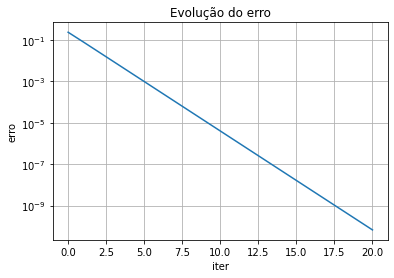

In [5]:
ax = None
vs, ls = itera(A, np.random.rand(2), tol=1e-10)

alvo = np.array([1,1])/np.sqrt(2)

erros = [norm(v-alvo) for v in vs]

plt.semilogy(erros)
plt.xlabel("iter")
plt.ylabel("erro")
plt.title("Evolução do erro")
plt.grid()
ax = plt.gca()
plt.show()

In [6]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

ys = ax.lines[0].get_ydata()

assert 1e-12 < min(ys) < 1e-10
assert np.all(ys[:-1] > ys[1:])

O que o último assert quer dizer?

O último assert verifica se a função é descrescente, no nosso problema esse comportamento representa que ao aumentar o número de iterações, o erro tende a diminuir. 

Desse modo, o assert verifica se um vetor $y_1$ composto por todos os elementos de um vetor $y$ com exceção do último, possui seus elementos correspondentes ao índice $i$ ($y_1[i]>y_2[i]$) maiores que um vetor $y_2$ composto por todos os valores do vetor $ys$ com excessão do primeiro.

Logo, se temos um vetor
$$ys = \begin{bmatrix}
a & b & c & d & e\\
\end{bmatrix}^T$$

Podemos verificar se possui comportamento decrescente se garantimos que:

$$\begin{bmatrix}
a & b & c & d\\
\end{bmatrix} ^T> 
\begin{bmatrix}
 b & c & d & e\\
\end{bmatrix} ^T $$

Pois para cada indice $i$, se garantimos que $ys[i]>ys[i+1]$, então o gráfico é decrescente.

## Questão 3: Convergência comparada

Para cada um dos vetores `d1` e `d2` abaixo, considere a matriz $A = \operatorname{diag}(d_i)$ correspondente.

In [7]:
d1 = [1,10,20,30,31,32]
d2 = [1,10,20,29,30,32]

Qual é o autovetor com o maior autovalor para $A_1$ e $A_2$?

Uma matriz diagonal possui autovalores iguais aos elementos da diagonal. Sendo assim, O maior autovalor de $A_1$ corresponde ao maior valor do vetor $d_1$, bem como o maior autovalor de $A_2$ corresponde ao maior valor do vetor $d_2$.

$$d_1 =\begin{bmatrix}
1&10&20&30&31&32\\
\end{bmatrix} ^T$$

$$d_2 =\begin{bmatrix}
1&10&20&29&30&32\\
\end{bmatrix} ^T$$


O maior valor observado em $d_1$ é $32$, e em $d_2$ também é $32$. Como esse elemento se encontra na ultima posição de ambos os vetores $d_1$ e $d_2$, esse elemento na matriz $A= diag(d_i)$ irá corresponder a ultima linha e ultima coluna da matriz diagonal $A$. Sendo assim, como o tamanho do vetor é $6$, a matriz $A_{6x6}$ terá um autovetor $v_i$ correspondente aos maiores autovalores igual a

$$v_1 = v_2 =\begin{bmatrix}
0&0&0&0&0&1\\
\end{bmatrix} ^T$$


Agora, compare a velocidade de convergência do autovetor usando `itera` para cada uma destas matrizes,
fazendo o gráfico do erro entre os vetores gerados para $A_1$ e $A_2$ no mesmo eixo.

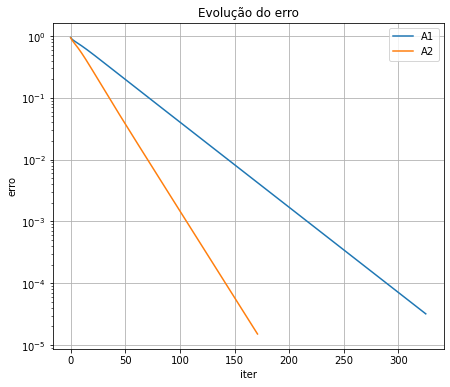

In [8]:
ax = None

vs_1, _ = itera(np.diag(d1), np.ones(6))
vs_2, _ = itera(np.diag(d2), np.ones(6))


alvo = np.array([0,0,0,0,0,1])
erros1 = [norm(v-alvo) for v in vs_1]
erros2 = [norm(v-alvo) for v in vs_2]

plt.figure(figsize=(7,6))
plt.semilogy(erros1, label="A1")
plt.semilogy(erros2,  label="A2")
plt.xlabel("iter")
plt.ylabel("erro")
plt.title("Evolução do erro")
plt.grid()
ax = plt.gca()
plt.legend()
plt.show()

In [9]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

Para qual matriz há convergência mais rápida?  Como você explicaria isso?

A matriz que converge mais rápido é a segunda matriz diagonal $A_2$:

$$ A^n x = \sum x_i v_i(\lambda_i)^n$$

Como podemos observar acima, conforme $n→∞$, a parcela do somatório que possui maior peso é aquela que possui o maior valor $\lambda_i$, pois este valor está elevado a potência $n$.  
Então o autovetor que o método converge, conforme $n→∞$ é justamente aquele que possui maior autovalor associado:

$$
\frac{A^nx}{||A^nx||} →\frac{v_1}{||v_1||}
$$

Sendo assim, o método converge mais rápido quando existe um autovalor muito maior que o restante dos autovalores. No nosso problema inicial, temos que os elementos de $d_2$ são mais distantes de $32$ em comparação com os elementos de $d_1$. Por esse motivo, o erro diminui com menos iterações para $A_2$, ou seja, o método precisa de menos iterações para convergir.  


## Questão 4: Convergência?

Sejam $\theta \in [0,2\pi]$ e $\alpha \in \mathbb{R}$,
e considere a matriz 
$$A(\theta, \alpha) = \begin{bmatrix} 
\cos(\theta) & \sin(\theta) & 0\\
-\sin(\theta) &\cos(\theta) &  0\\
0 & 0 & \alpha\\
\end{bmatrix}.$$

Qual a interpretação geométrica dessa matriz?

Essa matriz caracteriza-se por fazer uma transformação linear de rotação. Espeficicamente no nosso caso:

$$Ax = \begin{bmatrix} 
\cos(\theta) & \sin(\theta) & 0\\
-\sin(\theta) &\cos(\theta) &  0\\
0 & 0 & \alpha\\
\end{bmatrix}.  \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$$

A matriz $A$ aplica uma transformação linear de rotação (em relação a um ângulo $\theta$) entre $x_1$ e $x_2$, ou seja, rotaciona o vetor $x$ por um ângulo $\theta$ no plano formado pelos eixos $x$ e $y$(nas componentes $x_1$ e $x_2$ de $x$).

Enquanto para $x_3$, ou então o eixo $z$, a Matriz $A$ ao multiplicar $x$, multiplica por $\alpha$ a coordenada em $z$ do vetor $x$ ($x_3$).


Quais são os autovetores de $A$ (em função de $\theta$ e $\alpha$)?

Temos que $$Av = \lambda v$$

$$Av - \lambda v = 0$$

$$v(A - \lambda) = 0$$

$$v(A - \lambda I) = 0$$

Contudo, o autovetor, nao pode ser $0$, logo, temos que  $det(A - \lambda I)=0$

$$ \begin{bmatrix}
cos(\theta) - \lambda & sin(\theta) & 0\\
-sin(\theta) & cos(\theta) - \lambda & 0\\
0 & 0 & \alpha - \lambda 
\end{bmatrix}
$$

O determinante dessa matriz se dá por

$$det(A - \lambda I)=  (cos(\theta) - \lambda)^2 (\alpha - \lambda) +(\alpha-\lambda)sen^2(\theta) = 0$$

$$ det(A - \lambda I)= (\alpha - \lambda) \cdot (cos^2(\theta) + sen^2(\theta) - 2\lambda cos(\theta) + \lambda^2) = 0$$


$$ det(A - \lambda I)= (\alpha - \lambda) \cdot (1 - 2\lambda cos(\theta) + \lambda^2) = 0$$

Logo, temos que

$$\begin{equation}
    \begin{cases}
     \alpha - \lambda = 0\\
     \text{ou}\\
     1 - 2\lambda cos(\theta) + \lambda^2 = 0 \\
    \end{cases}       
\end{equation}
$$

Ou seja, nosso primeiro autovalor da matriz $A$ pode ser facilmente extraido:
$$\lambda_1 = \alpha $$

Os próximos autovalores são encontrados ao resolver a equação de segundo grau a seguir:

$$1 - 2\lambda cos(\theta) + \lambda^2 = 0 $$

Contudo, ao aplicar Bháskara, encontramos $$\Delta = cos^2(\theta)-1 = -sen^2(\theta) $$

O que evidencia que os autovalores de $\lambda_2$ e $\lambda_3$ são números complexos:

$$\begin{equation}
    \begin{cases}
     \lambda_1 = \alpha\\
     \lambda_2 = cos(\theta) - i \cdot sin(\theta)\\
     \lambda_3 = cos(\theta) + i \cdot sin(\theta) \\
    \end{cases}       
\end{equation}
$$

Logo, com os autovalores resolvidos, os autovetores podem ser calculados ao resolver o sistema linear $(A-\lambda I)v_i = 0$ para encontrar as coordenadas $i$ dos autovetores. 

Para p nosso primeiro autovalor $\lambda_1$, temos que $v_1 =\begin{bmatrix}
0&0&1\\
\end{bmatrix} ^T$, o que intuitivamente já poderia ser previsto, pois qualquer vetor no eixo $z$ não é rotacionado, embora a amplitude seja influenciada por $\alpha$.

Para nosso segundo autovalor $\lambda_2$, temos que $v_2 =\begin{bmatrix}
ix&x&0\\
\end{bmatrix} ^T$, onde $x$ pode assumir qualquer valor real, logo $v_2 =\begin{bmatrix}
i&1&0\\
\end{bmatrix}^T$ é o autovetor encontrado a partir de $\lambda_2$.


Para nosso terceiro autovalor $\lambda_3$, temos que $v_3 =\begin{bmatrix}
-ix&x&0\\
\end{bmatrix} ^T$, onde $x$ pode assumir qualquer valor real, logo $v_3 =\begin{bmatrix}
-i&1&0\\
\end{bmatrix}^T$ é o autovetor encontrado a partir de $\lambda_3$.

Implemente a função abaixo que gera a matriz $A$:

In [10]:
def make_matrix(t, a):
  A = np.array([[np.cos(t), np.sin(t), 0], [-np.sin(t), np.cos(t), 0], [0,0, a]])
  return A

In [11]:
assert np.allclose(make_matrix(0,1),np.eye(3))
assert np.allclose(make_matrix(np.pi,0.5),[[-1,0,0],[0,-1,0],[0,0,0.5]])

Fixando $\theta = \dfrac{\pi}{4}$,
faça um gráfico do número de iterações necessários para calcular o maior autovetor,
em função de $\alpha \in [0.5,1.5]$, com precisão `1e-12`.

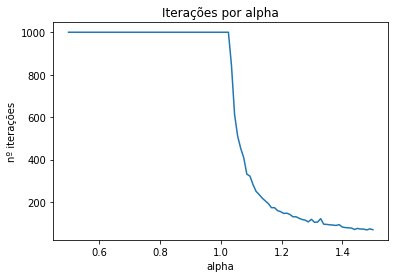

In [12]:
from numpy.core.function_base import linspace
alphas = np.linspace(0.5,1.5,100)
ax = None

iter = []
for a in alphas:
  A = make_matrix(np.pi/4, a)
  vs, ls = itera(A, np.random.rand(3), tol=1e-12)
  iter.append(len(vs))

plt.plot(alphas, iter)
plt.title("Iterações por alpha")
plt.xlabel("alpha")
plt.ylabel("nº iterações")
ax = plt.gca()
plt.show()

In [13]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""

ys = ax.lines[0].get_ydata()

assert 100 > ys.min() > 60
assert ys[55] < 600
assert ys[50] > 900

Agora, faça o gráfico com a estimativa do autovalor, novamente em função de $\alpha$.

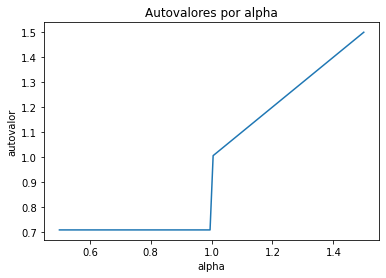

In [14]:
ax = None

autovalor= []
for a in alphas:
  A = make_matrix(np.pi/4, a)
  vs, ls = itera(A, np.random.rand(3), tol=1e-12)
  autovalor.append(ls[-1])

plt.plot(alphas, autovalor)
plt.title("Autovalores por alpha")
plt.xlabel("alpha")
plt.ylabel("autovalor")
ax = plt.gca()
plt.show()


In [15]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""

ys = ax.lines[0].get_ydata()

assert np.all(0.7 <= ys) and np.all(ys <= 1.5)

Como explicar a variação no número de iterações? O que isso tem a ver com o autovalor retornado?

Considerando nosso $\theta = \frac{\pi}{4}$, nossos autovalores buscados pelo método aplicado são:

$$\begin{equation}
    \begin{cases}
     \lambda_1 = \alpha\\
     \lambda_2 = \frac{\sqrt{2}}{2}- i \frac{\sqrt{2}}{2}\\
     \lambda_3 = \frac{\sqrt{2}}{2} + i \frac{\sqrt{2}}{2} \\
    \end{cases}       
\end{equation}
$$


Quando nosso $\alpha > 1$, temos que nosso método vai convergir para $\lambda_1 = \alpha$ e nosso autovetor $v_1$ associado, pois este é o maior autovalor de $A$. Quanto maior for o $\alpha$, mais distante o autovetor e autovalor calculado no método estará do $\lambda_2$ e $\lambda_3$, e então mas rápida é a convergencia.

Esse comportamento pode ser verificado tanto no primeiro gráfico, onde o número de iterações cai exponencialmente conforme $\alpha$ aumenta assume valores ainda maiores que $1$. Além disso, no gráfico onde verificamos os autovalores encontrados, também podemos confirmar a tendência do método em que o autovalor calculado tende a $\alpha$ pelo comportamento linear identificado a partir de $\alpha>1$.


# Questão 5: Autovalores negativos

Em princípio, tudo deveria funcionar de forma muito similar para autovalores **negativos**.

Estude o caso $\alpha \in [-1.5, -0.5]$, fazendo os dois gráficos lado a lado.

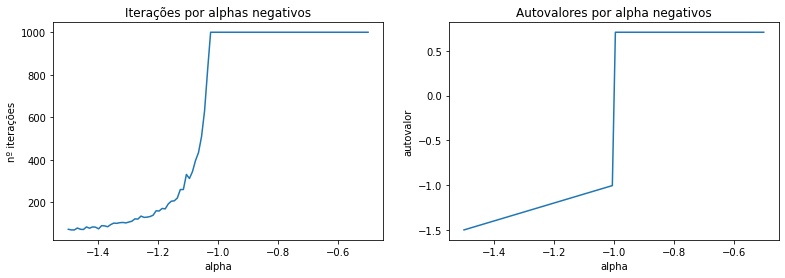

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
negalphas = np.linspace(-1.5, -0.5, 100)


iter = []
autovalor= []
for a in negalphas:
  A = make_matrix(np.pi/4, a)
  vs, ls = itera(A, np.random.rand(3), tol=1e-12)
  iter.append(len(vs))
  autovalor.append(ls[-1])


ax1.plot(negalphas, iter)
ax1.set_title("Iterações por alphas negativos")
ax1.set_xlabel("alpha")
ax1.set_ylabel("nº iterações")


ax2.plot(negalphas, autovalor)
ax2.set_title("Autovalores por alpha negativos")
ax2.set_xlabel("alpha")
ax2.set_ylabel("autovalor")

plt.show()


In [17]:
assert ax1.title.get_text() != ""
assert len(ax1.lines) == 1
assert ax1.get_xlabel() != ""

ys1 = ax1.lines[0].get_ydata()

assert 100 > ys1.min() > 60
assert ys1[44] < 600
assert ys1[49] > 900


assert ax2.title.get_text() != ""
assert len(ax2.lines) == 1
assert ax2.get_xlabel() != ""

ys2 = ax2.lines[0].get_ydata()

assert np.all(0.71 >= ys2)
assert np.all(ys2 >= -1.5)

Para funcionar, o teste `ys1[i] < 600` teve seu índice foi trocado de `55` para `44`.
Explique esta mudança, tanto do ponto de vista matemático,
quanto da linguagem Python. 

Nos primeiro gráficos plotados, os valores a direita do valor de $\alpha=1$ convergiam em menos iterações e o autovalor convergia para $\alpha$. Já nos gráficos onde $\alpha$ pertence a um intervalo de números negativos, ou seja,  $\alpha \in [-1.5, -0.5]$, temos que  os valores a esquerda de $\alpha = -1$ possuem essas propriedades.

Sendo assim, para valores onde $\alpha<-1$, nosso método tende a encontrar o autovalor $\lambda_1 = \alpha$, e quanto menor o $\alpha$, as iterações decaem exponencialmente, como pode ser observado pelo gráfico. Além disso, se olhassemos um intervalo um pouco maior, que englobasse ambos os gráficos, poderia ser percebido que conforme $\alpha$ é percorrido, em algum momento os gráficos parecem se espelhar, em especial o do numero de iterações.

De um ponto de vísta matemático, é como se uma coordenada $k=55$ dentre os $100$ diferentes valores de $\alpha$ dados em cada intervalo corresponder ao ponto onde $k=44$ com o intervalo invertido, como exemplificado abaixo:

Tendo um vetor $u_1$ inicial,
$$ u_1 = \begin{bmatrix}
a&b&c&d&e&f&g&h&i&j\\
\end{bmatrix}^T
$$

Ao inverte-lo, obtemos $u_2$:
$$u_2 =  \begin{bmatrix}
j&i&h&g&f&e&d&c&b&a\\
\end{bmatrix}^T
$$

O elemento $g$, no vetor original $u_1$ possui índice $i=6$, enquanto no vetor invertido possui índice $i=3$, o que não é simétrico em relação ao número total de coordenadas do vetor $u_1$, que possui $10$ elementos, por conta da implementação de listas em python, que começa a partir do índice $0$ e do nosso vetor possuir uma quantidade par de elementos, como exemplificado acima.

Explique, também, porque $0.71$ deve ser suficiente como cota superior. (Aqui, é "só" matemática, mas a matemática pode ser um pouco mais complexa)

Isso acontece devido aos autovalores e autovetores  $\lambda_2 = \frac{\sqrt{2}}{2}- i \frac{\sqrt{2}}{2}$,  $\lambda_3 = \frac{\sqrt{2}}{2} + i \frac{\sqrt{2}}{2}$ possuirem uma componente imaginária.

Sendo assim, como nosso método só considera valores reais, temos que os autovetores aproximados pelo método vão tender para $\lambda_2$ e $\lambda_3$, e como possuem a parcela do $sin(θ)$ no domínio dos complexos, essa parte será ignorada pelo método, então os autovalores calculados serão aproximados pela parcela $cos(\frac{\pi}{4}) = \frac{\sqrt{2}}{2} \approx 0.707$.

Como os autovalores aproximados não encontrarão autovetores possíveis onde garanta que $Av=\lambda v$ a uma certa tolerância dada, então o método nunca vai convergir e vai atingir o número de iterações limite dado como `maxiter` para os valores a direita de $\alpha>-1$.

# Questão 6: Mudando $\theta$

A velocidade de convergência muda ao trocar $\theta$?
Teste outros valores, e refaça os gráficos, agora com várias curvas em cada eixo,
uma para cada um dos valores de $\theta$ que você estudou.

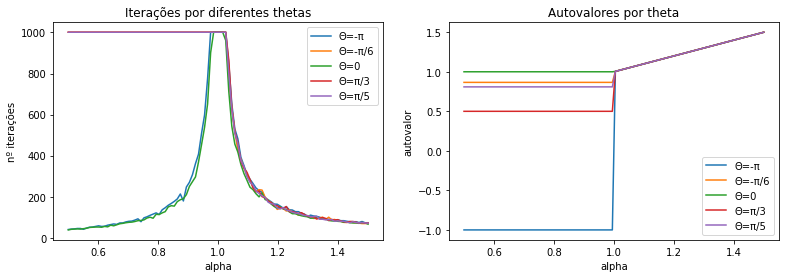

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

tetas = [-np.pi, -np.pi/6,0, np.pi/3, np.pi/5]
legenda = ["-π", "-π/6","0","π/3", "π/5"]
alphas = np.linspace(0.5,1.5,100)

for (t, l)in zip(tetas, legenda):
  iter = []
  autovalor = []
  for a in alphas:
    A = make_matrix(t, a)
    vs, ls = itera(A, np.random.rand(3), tol=1e-12)
    iter.append(len(vs))
    autovalor.append(ls[-1])


  ax1.plot(alphas, iter, label=f"Θ={l}")
  ax2.plot(alphas, autovalor, label=f"Θ={l}")

ax1.set_title("Iterações por diferentes thetas")
ax1.set_xlabel("alpha")
ax1.set_ylabel("nº iterações")
ax1.legend()

ax2.set_title("Autovalores por theta")
ax2.set_xlabel("alpha")
ax2.set_ylabel("autovalor")
ax2.legend()

O que você observa?  Isso faz sentido?

Nessa questão foram testados para os valores de $\theta \in \{-\pi,-\frac{\pi}{6}, 0, \frac{\pi}{3}, \frac{\pi}{5} \}$. 
Como observado na questão anterior, temos que o número de iterações mantém o mesmo padrão para todos os valores de $\theta$ com exceção de $\theta=0$ e $\theta=-\pi$. 

Pelo mesmo raciocínio elaborado anteriormente, o que acontece com o método, é que para valores de $\alpha$ no intervalo de $(-1, 1)$ o método converge para os autovalores com componentes $sin(\theta)$ complexas, que ao ignorar tais partes (não trata números complexos) converge para um autovalor $\lambda_k=cos(\theta)$. 

Quando $\theta=0=k\pi$ onde $k$  pode assumir valores inteiros quaisquer, temos que $sin(\theta)=0$. Então a parte imaginária pode, de fato, ser descartada e o método converge. Portanto, para esses valores especifícos do ângulo $\theta$, o comportamento é convergir em menos iterações conforme $\alpha →0$. 

Enquanto para o restante dos valores em que $\theta$ pode assumir, o método não converge dentro da tolerância dada, tendo em vista que atinge o número máximo de iterações `maxiter`. O método apenas converge quando $\alpha <<-1$ ou quando $\alpha>>1$, pois nesse valores, nosso algoritmo tende a convergir para o autovalor $\lambda_1=\alpha$. 

Esse comportamento pode ser observado no segundo gráfico, onde converge para diferentes autovalores $\lambda_i$ dependendo do valor de $\alpha$. Dentro do intervalo $(-1,1)$ tende ao $cos(\theta)$ e fora desse intervalo tende para $\alpha$. 

No gráfico a seguir, são mostrados os comportamentos específicos mencionados acima, nos quais $\theta= k\pi$, para $k \in \mathbb{Z}$:

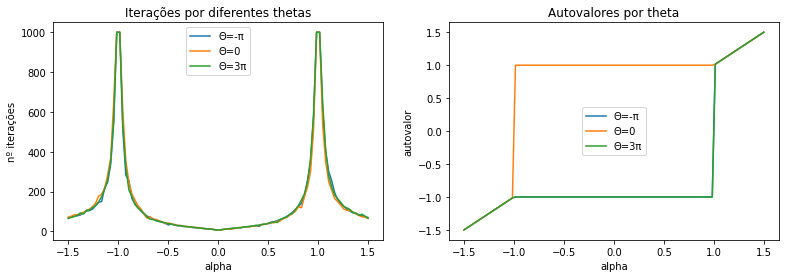

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

tetas = [-np.pi,0, np.pi, 3*np.pi,  ]
legenda = ["-π","0","3π"]
alphas = np.linspace(-1.5,1.5,100)

for (t, l)in zip(tetas, legenda):
  iter = []
  autovalor = []
  for a in alphas:
    A = make_matrix(t, a)
    vs, ls = itera(A, np.random.rand(3), tol=1e-12)
    iter.append(len(vs))
    autovalor.append(ls[-1])


  ax1.plot(alphas, iter, label=f"Θ={l}")
  ax2.plot(alphas, autovalor, label=f"Θ={l}")

ax1.set_title("Iterações por diferentes thetas")
ax1.set_xlabel("alpha")
ax1.set_ylabel("nº iterações")
ax1.legend()

ax2.set_title("Autovalores por theta")
ax2.set_xlabel("alpha")
ax2.set_ylabel("autovalor")
ax2.legend()